In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline

In [2]:
data_test=pd.read_csv(r'C:\Users\jibin\Downloads\test_AbJTz2l.csv')

In [3]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
data_test.shape

(5681, 11)

In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
data_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
data_test.ndim

2

In [9]:
# pre processing

In [10]:
data_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

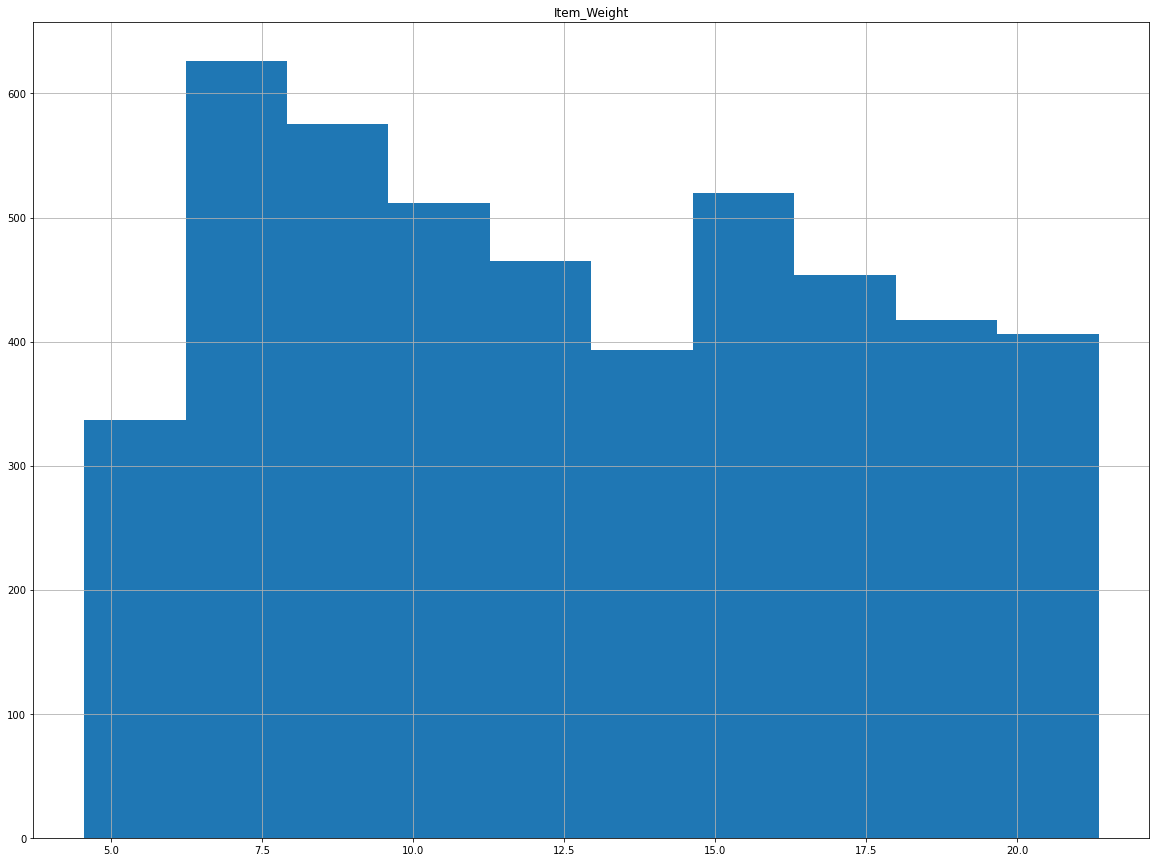

In [11]:
# Plotting to know how to fill the mising data
freqgraph=data_test[['Item_Weight']].select_dtypes(include=['float']) # data is normally distributed,hence the missing values are filled-mean
freqgraph.hist(figsize=(20,15))
plt.show();

In [12]:
data_test['Item_Weight']=data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean())

In [13]:
data_test.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
data_test['Outlet_Size'].nunique()

3

In [15]:
data_test['Outlet_Identifier'].nunique()

10

In [16]:
data_test['Outlet_Establishment_Year'].nunique()

9

In [17]:
data_test['Item_Identifier'].nunique()

1543

In [18]:
data_test['Item_MRP'].nunique()

4402

In [19]:
data_test=data_test.drop(['Outlet_Size'], axis=1) # missing value is greater than 10%

In [20]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Tier 3,Supermarket Type3


C:\Users\jibin\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


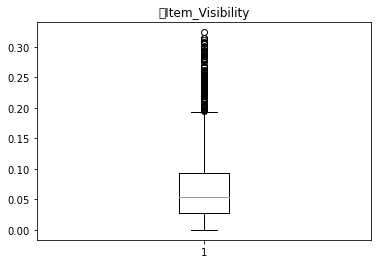

In [21]:
plt.boxplot(data_test[ 'Item_Visibility'])
plt.title('	Item_Visibility');       

In [22]:
Q1=np.percentile(data_test['Item_Visibility'],25,interpolation='midpoint')
Q2=np.percentile(data_test['Item_Visibility'],50,interpolation='midpoint')
Q3=np.percentile(data_test['Item_Visibility'],75,interpolation='midpoint')


In [23]:
print(Q1)
print(Q2)
print(Q3)

0.027046875
0.054154252
0.093462623


In [36]:
IQR=Q3-Q1
print(IQR)

0.066415748


In [39]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-0.072576747
0.193086245


In [43]:
outlier=[]
for i in data_test['Item_Visibility']: # finding outliers
    if(i>up_lim) or (i<low_lim):
        outlier.append(i)

In [45]:
outlier

[0.196897637,
 0.291322397,
 0.299544153,
 0.246178257,
 0.262504325,
 0.238990225,
 0.216762584,
 0.23372937,
 0.195963464,
 0.197679823,
 0.280083047,
 0.279663801,
 0.214306131,
 0.268966279,
 0.229678918,
 0.203400773,
 0.310376916,
 0.224472159,
 0.209684121,
 0.203536932,
 0.28704117,
 0.274592283,
 0.308258994,
 0.249342884,
 0.201643565,
 0.242768664,
 0.224830093,
 0.220221011,
 0.219568112,
 0.277579189,
 0.253421913,
 0.239568811,
 0.203400773,
 0.285077835,
 0.281955554,
 0.227609738,
 0.237725726,
 0.202948268,
 0.256919126,
 0.294472634,
 0.225662275,
 0.20473381,
 0.199825987,
 0.253947823,
 0.238868509,
 0.223633668,
 0.267753377,
 0.196267755,
 0.267701662,
 0.222132498,
 0.230246928,
 0.323637245,
 0.267106722,
 0.247843179,
 0.214952566,
 0.226084177,
 0.215728288,
 0.196572047,
 0.238579765,
 0.20192757,
 0.212767095,
 0.267339659,
 0.215072945,
 0.313541543,
 0.203588239,
 0.21471985,
 0.216601163,
 0.250008736,
 0.245136905,
 0.244163174,
 0.305724969,
 0.21991455

In [47]:
ind=data_test['Item_Visibility']>up_lim
data_test.loc[ind].index     

Int64Index([  19,   46,   76,   78,   89,  138,  242,  333,  352,  360,
            ...
            5157, 5175, 5277, 5290, 5435, 5469, 5482, 5514, 5571, 5668],
           dtype='int64', length=113)

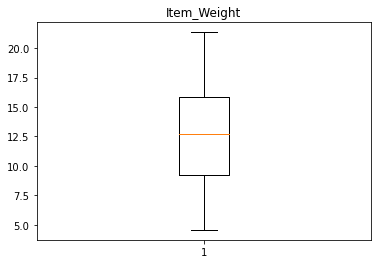

In [25]:
plt.boxplot(data_test[ 'Item_Weight'])
plt.title('Item_Weight');       

In [26]:
data_train=pd.read_csv(r'C:\Users\jibin\Downloads\train_v9rqX0R.csv')

In [27]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
data_train.shape

(8523, 12)

In [29]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [30]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [31]:
data_train['Item_MRP'].nunique()

5938

In [32]:
data_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

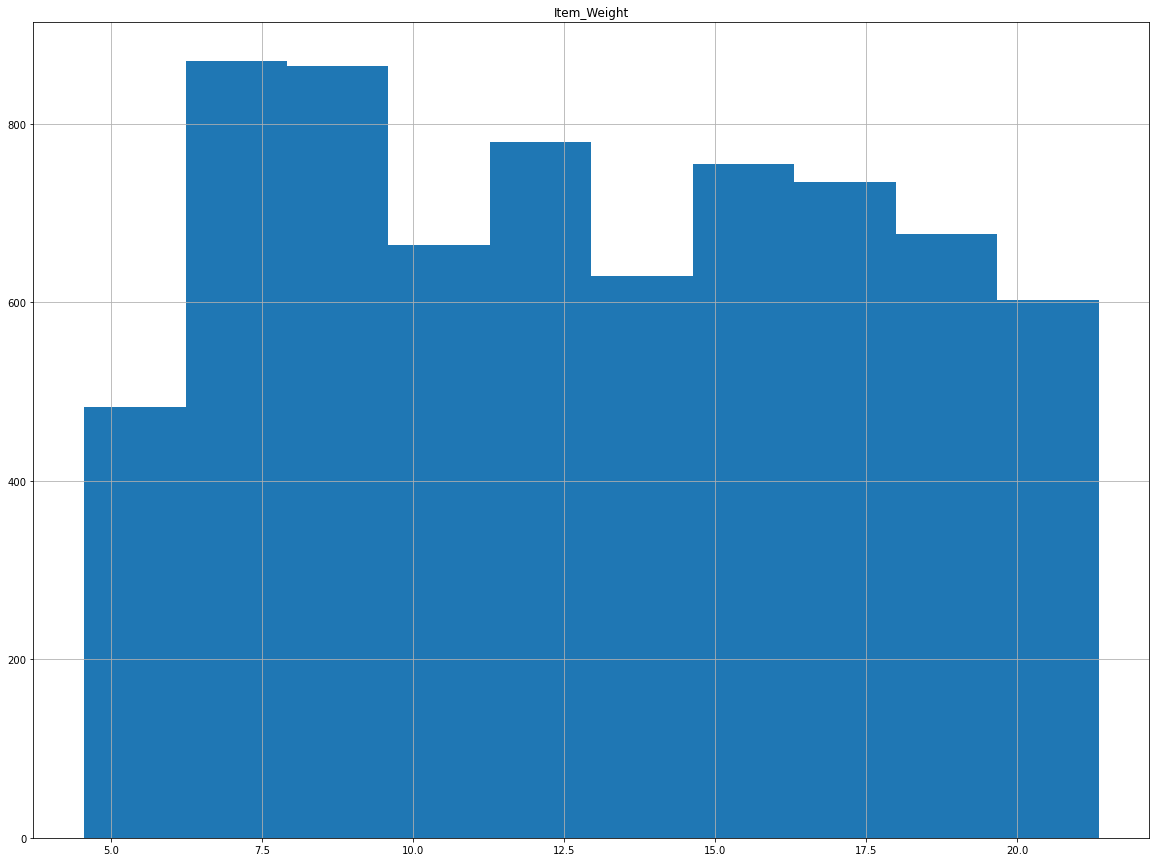

In [33]:
# Plotting to know how to fill the mising data
freqgraph=data_train[['Item_Weight']].select_dtypes(include=['float']) # data is normally distributed,hence the missing values are filled-mean
freqgraph.hist(figsize=(20,15))
plt.show();

In [34]:
data_train['Item_Weight']=data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean())